# 도미와 빙어 분류3
프로그램 개요 : 그래프로 그려보면 샘플이 도미에 가까웠지만, 이상하게 빙어라고 예측을 했다. 그 이유는 두 특성인 길이와 무게의 스케일이 다르기 때문이다. 길이보다 무게의 크기에 따라 예측값이 좌지우지된다. 대부분의 머신러닝 알고리즘은 특성의 스케일이 다르면 잘 작동하지 않는다. 이를 위해 특성을 표준점수로 변환했다. 주의할 점은 훈련 세트를 변환한 방식 그대로 테스트 세트도 같이 변환해 줘야 한다. 그렇지 않으면 제대로 동작하지 않는다.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1, 2, 3], [4, 5, 6], [7, 8, 9]))    # 연결할 리스트를 튜플로 전달해줌

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
print(np.zeros(5))

[0. 0. 0. 0. 0.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   # 두 리스트를 일차원 배열로 연결해줌

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)    # random_state 매개변수는 랜덤값을 임의로 지정해 주는것 같은 숫자를 넣으면 같은 값이 나온다.

In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)    # 도미와 빙어의 비율을 맞춰주기 위해 stratify 매개변수를 설정해줌
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print('length of train_input :' , len(train_input) , ',' , 'length of test_input : ' , len(test_input))   # 결과에서 볼 수 있듯 train_test_split 함수는 3 : 1 비율로 나눠준다.

length of train_input : 36 , length of test_input :  13


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


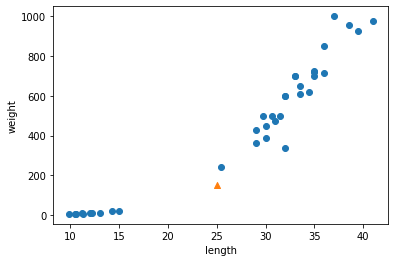

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])     # KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5개이므로 5개의 이웃 반환

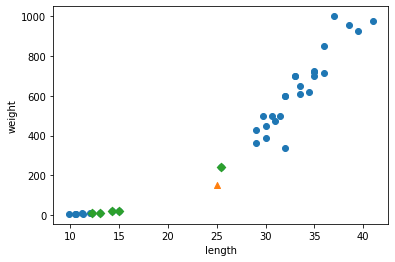

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_target[indexes])    # 1개만 도미이고 나머지는 빙어

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


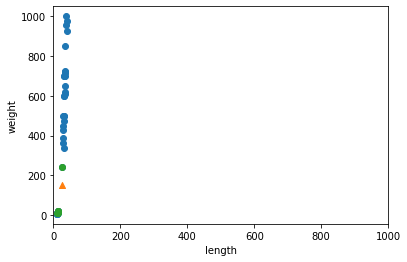

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위에서 볼 수 있든 x축과 y축의 범위가 달랐기 때문에 이를 같게 설정해 주면 위 그래프와 같이 나온다. 따라서 x축인 length는 거의 고려가 되지 않는것을 볼 수 있다. 이것이 잘못된 값을 예측하는 원인. 이를 두 특성의 스케일(scale)이 다르다고 한다. 알고리즘이 거리 기반일때 올바르게 예측할 수 없는 원인 중 하나이다. 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 한다. 이런 작업을 데이터 전처리(data preprocessing)라고 부른다.

가장 널리 사용하는 전처리 방법 중 하나는 표준점수(standard score)이다. (혹은 z 점수라고도 부른다.) 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다. 계산 방법은 평균을 빼고 표준편차를 나누어 주면 된다. 넘파이는 이 두 함수를 모두 제공한다.

In [ ]:
mean = np.mean(train_input, axis = 0) # 평균 계산
std = np.std(train_input, axis = 0)   # 표준편차 계산

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std

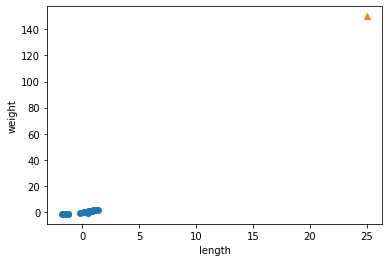

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

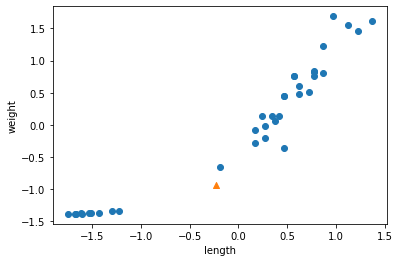

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


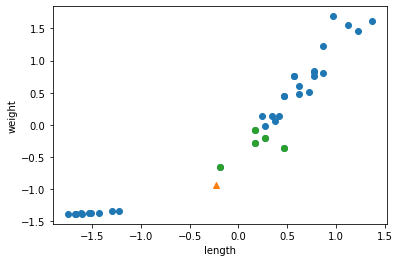

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()